In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

% matplotlib inline

In [2]:
diretorios = ['P10', 'P15', 'P20', 'P25']
bufferDataFile = 'bufferData.csv'
taxaMacDataFile = 'taxaMACDATA.csv'

folder = diretorios[0]

dfBuffer = pd.read_csv(os.path.join('../Simulations',folder,bufferDataFile),delimiter="|") 
dfBuffer.head()

,Tempo,Nó Sensor,Taxa Buffer,Potencia,Repetição
0,3.041979,3,3.125,-10,1
1,5.803576,1,3.125,-10,1
2,5.806256,5,3.125,-10,1
3,7.006296,5,3.125,-10,1
4,7.206302,5,6.250,-10,1


In [3]:
from matplotlib.ticker import FuncFormatter

def ticker_formatter(x, pos):
    'The two args are the value and tick position'
    if x >= 1000:
        return '{:1.0f}K'.format(x*1e-3)
    return '{:.0f}'.format(x)

formatter = FuncFormatter(ticker_formatter)

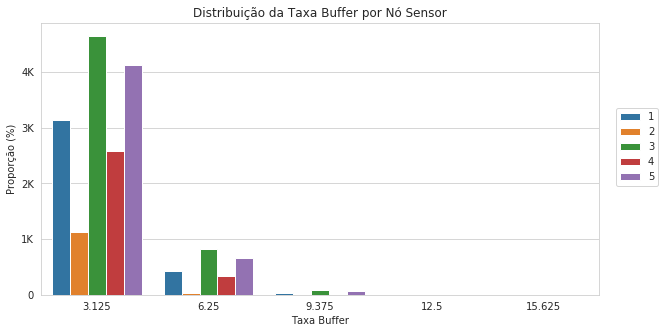

In [4]:
plt.figure(figsize=(10,5))
ax = plt.subplot()
plt.title('Distribuição da Taxa Buffer por Nó Sensor')

ax = sns.countplot(x='Taxa Buffer',hue='Nó Sensor',data=dfBuffer,ax=ax)
ax.legend(loc=(1.03,0.4))

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_label('Proporção')
ax.yaxis.label.set_text("Proporção (%)")

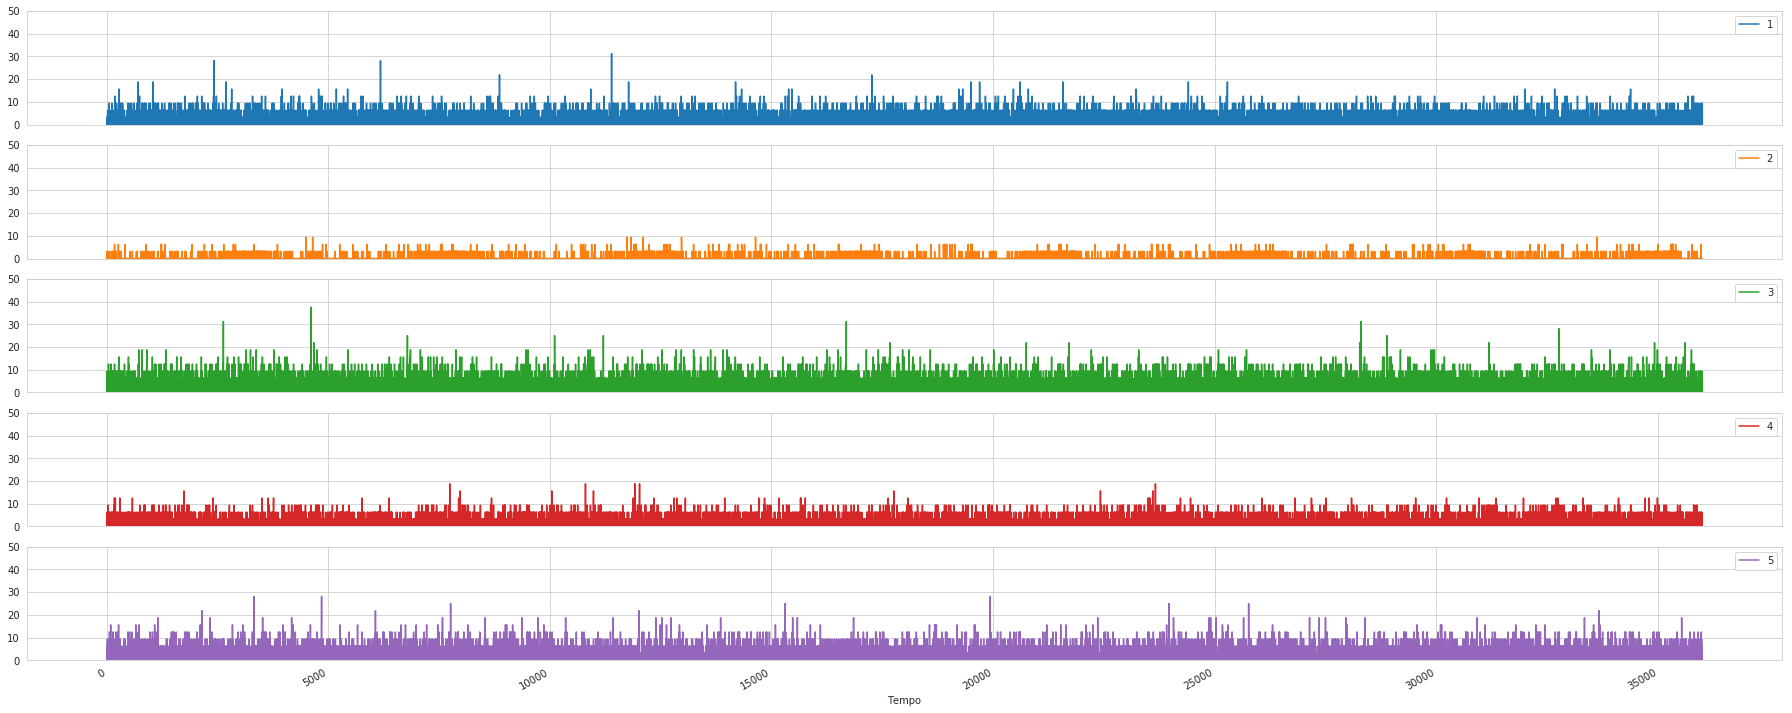

In [6]:
df = dfBuffer[['Tempo','Nó Sensor', 'Taxa Buffer']]

dfPivot = df.pivot(index='Tempo',columns='Nó Sensor',values='Taxa Buffer')
dfPivot.fillna(value=0,inplace=True)
dfPivot.head()

axes = dfPivot.plot(subplots=True, figsize=(25, 10),ylim=(0,50),legend=True,style='-')

plt.savefig('saida.png')
plt.tight_layout()

In [4]:
# df = dfP10Buffer[['Tempo','Nó Sensor', 'Taxa Buffer']]

# dfPivot = df.pivot(index='Tempo',columns='Nó Sensor',values='Taxa Buffer')

# fig, axes = plt.subplots(nrows=3,ncols=2,sharex=False,sharey=True,figsize=(10,10))
# ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

# dfPivot[1].plot.hist(ax=ax1,histtype='bar')
# ax1.set_title('Nó sensor 1')

# dfPivot[2].plot.hist(ax=ax2,histtype='bar')
# ax2.set_title('Nó sensor 2')

# dfPivot[3].plot.hist(ax=ax3,histtype='bar')
# ax3.set_title('Nó sensor 3')

# dfPivot[4].plot.hist(ax=ax4,histtype='bar')
# ax4.set_title('Nó sensor 4')

# dfPivot[5].plot.hist(ax=ax5,histtype='bar')
# ax5.set_title('Nó sensor 5')

In [5]:
# dfPivot.plot(kind='hist',histtype="bar",subplots=True,xticks=[0,3.25,6.25,9.375])

In [6]:
# help(dfPivot.plot)